<h1><center>АНАЛИЗ РЫНКА И ПРОГНОЗИРОВАНИЕ ПРОДАЖ КОМПЬЮТЕРНЫХ ИГР ДЛЯ ИНТЕРНЕТ-МАГАЗИНА "СТРИМЧИК"</center></h1>

Интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры, требуется выявить определяющие успешность игры закономерности. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).  Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Для исследования доступны данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й.

**ESRB*** (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Целью работы** является изучение датасета содержащего информацию о продаваемых в интернет-магазине компьютерных играх с целью выявления закономерностей успешности и составления рекламной кампании на 2017 год.

Для достижения цели поставлены следующие **задачи**:


**1. [Изучение общей инфорации](#Обзор-данных)**

**2. [Предобработка данных](#Предобработка-данных)**

**3. [Проведение исследовательского анализа данных](#Исследовательский-анализ-данных)**

   * Построение распределения общих продаж по датам
   * Определение срока существования игровых платформ
   * Определение актуального периода
   * Определение платформ лидирующих по продажам
   * Построение диаграммы размаха глобальных продаж в зависимости от платформы
   * Определение корреляции между продажами и оценками пользователей и критиков для наиболее популярной платформы
   * Построение распределеня игр по жанрам, выявление прибыльных жанров
    
    
**4. [Составление портрета пользователя для каждого региона](#Портрет-пользователя-в-регионе)**

   * Самые популярные платформы (топ-5)
   * Самые популярные жанры (топ-5)
   * Влияние рейтинга ESRB на продажи в отдельном регионе

**5. [Проверка гипотез](#Проверка-гипотез)** 

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**6. [Общий вывод](#Общий-вывод)**

**Описание данных** 

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

## Обзор данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

In [2]:
try:
    games = pd.read_csv(r'C:\Users\Jemiah\Documents\Jupyter_Data\games.csv')
except:
    games = pd.read_csv('/datasets/games.csv')

In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# для оценки размера датафрейма

start_len = games.shape[0]

In [5]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## Предобработка данных

**Обработка пропусков и типов данных**

In [6]:
# приведение названий столбцов к нижнему регистру

games.columns = games.columns.str.lower()

**NAME**

In [7]:
# приведение названий к нижнему регистру для избежания ошибок приводящих к дублированию

games['platform'] = games['platform'].str.lower()
games['name'] = games['name'].str.lower()

In [8]:
# удаление строк не содержащих название

games.dropna(subset=['name'], inplace=True)

**YEAR**

In [9]:
# жизненный срок платформы

years_of_life = games.pivot_table(index='platform',values='year',aggfunc=['min','max'])
years_of_life.columns=['min','max']
years_of_life['years_of_life']=years_of_life['max']-years_of_life['min']
years_of_life

years_of_life.sort_values(by = 'years_of_life', ascending = False)

,min,max,years_of_life
platform,,,
pc,1985.0,2016.0,31.0
ds,1985.0,2013.0,28.0
gb,1988.0,2001.0,13.0
x360,2005.0,2016.0,11.0
psp,2004.0,2015.0,11.0
ps2,2000.0,2011.0,11.0
nes,1983.0,1994.0,11.0
dc,1998.0,2008.0,10.0
wii,2006.0,2016.0,10.0


In [10]:
# жизненный срок платформы

years_of_life = games.pivot_table(index='platform',values='year',aggfunc=['min','max'])
years_of_life.columns=['min','max']
years_of_life['years_of_life']=years_of_life['max']-years_of_life['min']
years_of_life

years_of_life.sort_values(by = 'years_of_life', ascending = False)

,min,max,years_of_life
platform,,,
pc,1985.0,2016.0,31.0
ds,1985.0,2013.0,28.0
gb,1988.0,2001.0,13.0
x360,2005.0,2016.0,11.0
psp,2004.0,2015.0,11.0
ps2,2000.0,2011.0,11.0
nes,1983.0,1994.0,11.0
dc,1998.0,2008.0,10.0
wii,2006.0,2016.0,10.0


In [11]:
# избавляемся от строк с пропущенымми годами

print(games.query('year.isna()==True')['platform'].unique())
games = games.query('year.isna() == False')

['ps2' 'wii' '2600' 'x360' 'gba' 'pc' 'ps3' 'ps' 'psp' 'xb' 'gb' 'ds' 'gc'
 '3ds' 'n64' 'psv']


In [12]:
# изменение типа данных на datetime

games['year'] = games['year'].astype(np.int64)

**CRITIC SCORE**

In [13]:
# замена отсуствующей оценки критиков средней оценкой для каждой игры

games['critic_score'] = games['critic_score'].fillna(
    games.groupby('name')['critic_score'].transform('mean')
)

**USER SCORE**

In [14]:
# замена tbd на NaN

games.loc[games['user_score'] == 'tbd', 'user_score'] = np.nan

In [15]:
# изменение типа данных на float

games['user_score'] = games['user_score'].astype(np.float64)

In [16]:
# замена отсуствующей оценки пользователей средней оценкой для каждой игры

games['user_score'] = games['user_score'].fillna(
    games.groupby('name')['user_score'].transform('mean')
)

**RATING**

In [17]:
# cоздание словаря с индексами строк по названиям где пропущен рейтинг

print(
    len(games.query('rating == "EC"')), '\n',
    len(games.query('rating == "K-A"')), '\n',
    len(games.query('rating == "RP"')), '\n',
    len(games.query('rating == "AO"')), sep=''
)

games.loc[games['rating'].isna()==True, 'rating'] = 'unknown'

8
3
1
1


In [18]:
# сброс индексов после удалений строк

games.reset_index(drop=True, inplace=True)

* Пропуски в столбце **name** были удалены из-за незначительного кол-ва | Характер - полностью случайный
* Пропуски в столбце **critic_score** и **user_score** были по возможности заменены на среднее для каждой группы | Характер - случайный
* Пропуски в столбце **rating** и **year** были частично заполнены на основе поиска схожих данных в других строках | Характер - случайный
* Значение **tbd** было заменено на пропуск, т.к. эта аббревиатура означает отсутствие данных (to be determined - будет определено)
* Типы данных заменены в столбцах **year** (в этом столбце сохранены даты для которых есть специальный тип данных datetime), **user_score** (в этом столбце сохранены оценки от 1 до 10, которые можно адекватно обрабатывать если они имеют числовой тип данных, в данном случае float)

In [19]:
# check

games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16444 non-null  object 
 1   platform      16444 non-null  object 
 2   year          16444 non-null  int64  
 3   genre         16444 non-null  object 
 4   na_sales      16444 non-null  float64
 5   eu_sales      16444 non-null  float64
 6   jp_sales      16444 non-null  float64
 7   other_sales   16444 non-null  float64
 8   critic_score  8922 non-null   float64
 9   user_score    8524 non-null   float64
 10  rating        16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


**Обработка аномальных значений**

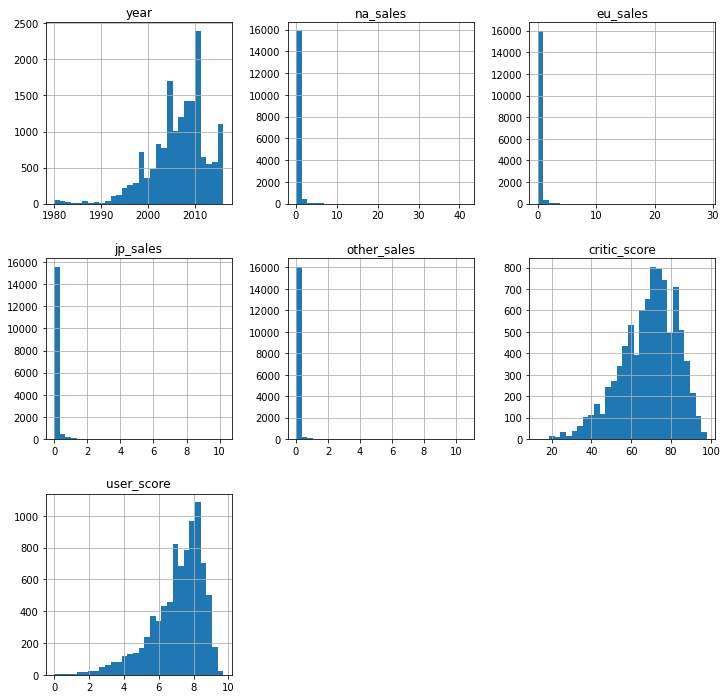

In [20]:
games.hist(figsize=(12,12), bins=30)
plt.show()

In [21]:
print(f'Доля изначального размера датафрейма: {games.shape[0] / start_len:0.2%}')

Доля изначального размера датафрейма: 98.38%


**RATING**

In [22]:
games['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

In [23]:
# формирование столбца суммарных продаж

games['total_sales'] = games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis=1)

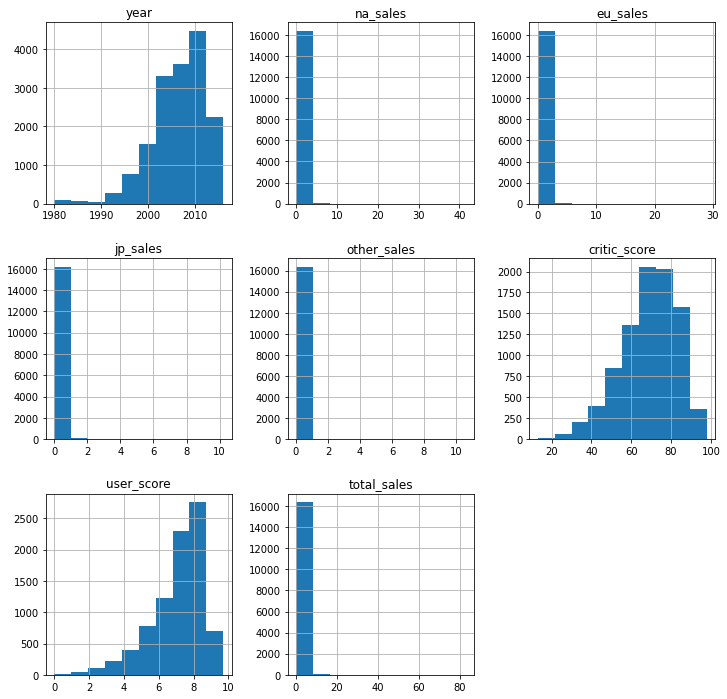

In [24]:
games.hist(figsize=(12,12))
plt.show()

In [25]:
print(f'Доля изначального размера датафрейма: {games.shape[0] / start_len:0.2%}')

Доля изначального размера датафрейма: 98.38%


In [26]:
games.reset_index(drop=True, inplace=True)

In [27]:
# check
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16444 non-null  object 
 1   platform      16444 non-null  object 
 2   year          16444 non-null  int64  
 3   genre         16444 non-null  object 
 4   na_sales      16444 non-null  float64
 5   eu_sales      16444 non-null  float64
 6   jp_sales      16444 non-null  float64
 7   other_sales   16444 non-null  float64
 8   critic_score  8922 non-null   float64
 9   user_score    8524 non-null   float64
 10  rating        16444 non-null  object 
 11  total_sales   16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


## Исследовательский анализ данных

**Кол-во игр выпускавшихся в каждом году**

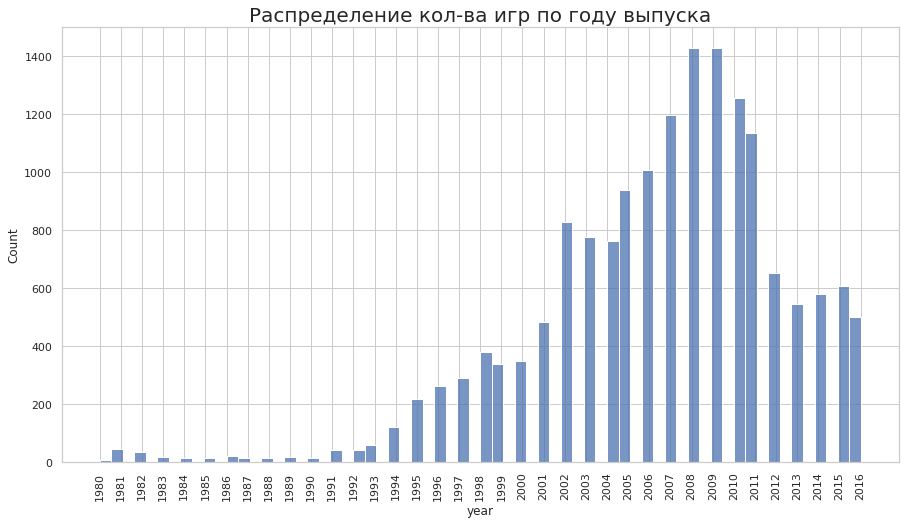

In [28]:
sns.set(style='whitegrid', rc={"figure.figsize":(15 , 8)})
sns.histplot(games['year']).set_title('Распределение кол-ва игр по году выпуска', fontsize=20)
plt.xticks(np.arange(1980, 2017), rotation=90)

plt.show()

Больше всего игр выпускалось в 2008 - 2009 г., после чего идёт снижение производства до 2013 г. где разработка снова начинает понемногу расти. Данные за 2016 год неполны, поэтому тут нельзя судить снилизлось ли производство или нет.

**Характерный период существования платформы**

In [29]:
# составление топа платформ по суммарным продажам

top_platforms = (
    games.pivot_table(index="platform", values="total_sales", aggfunc="sum")
    .sort_values(by="total_sales", ascending=False)
    .head(10)
)

print(top_platforms)

          total_sales
platform             
ps2           1233.56
x360           961.24
ps3            931.34
wii            891.18
ds             802.78
ps             727.58
ps4            314.14
gba            312.88
psp            289.53
3ds            257.81


Из составленного рейтина видно что первые 6 платформ имееют наивысшие показатели продаж.Топ-1 PlayStation 2

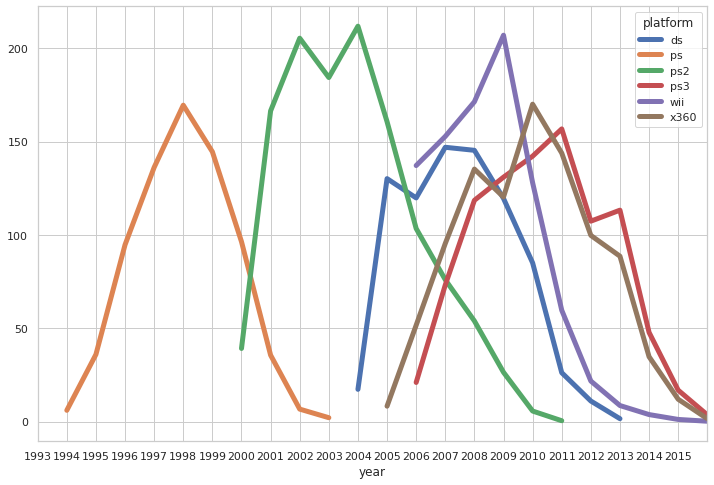

In [30]:
# %matplotlib notebook

sns.set(style='whitegrid', rc={"figure.figsize":(12 , 8)})

# список платформ с наибольшим числом продаж

num_of_plat = 6 # число платформ

top_platforms_list = list(
    games.pivot_table(index=["platform"], values=["total_sales"], aggfunc="sum")
    .sort_values(by="total_sales", ascending=False)
    .head(num_of_plat)
    .index
)

# таблица для построения распределения (eda - Exploratory Data Analysis)

eda = pd.concat(
    [games["platform"], 
     games["year"], 
     games["total_sales"], 
     games['user_score'], 
     games['critic_score'],
     games['genre']], 
    axis=1
)

# отсеиваем не попавшие в топ платформы

year_distr = eda.query("platform in @top_platforms_list")

# построение графика

year_distr.groupby(["year", "platform"])["total_sales"].sum().unstack().plot(
    kind="line", xlim=(1993, 2016), linewidth=5
)

plt.xticks(np.arange(1993,2016))

plt.show()

Крупные платформы проявляют жизнеспособность на протяжении ~10 лет.

**Актуальный период**

Поскольку период существования платформ составляет 10 лет, а одной из целей работы является прогноз продаж на 2017 год нас будут интересовать такие платформы которые только зарождаются или находятся на пике своего существования.

In [31]:
actual_period = games.query('year > 2013')
actual_period.head().sort_values(by='year')
actual_period.reset_index(drop=True, inplace=True)

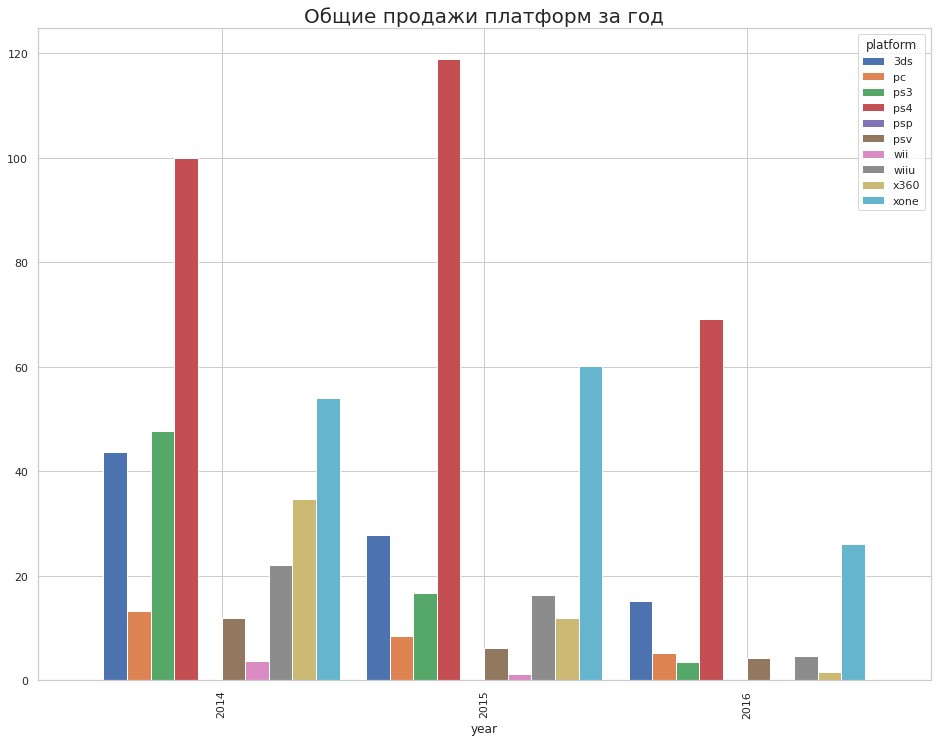

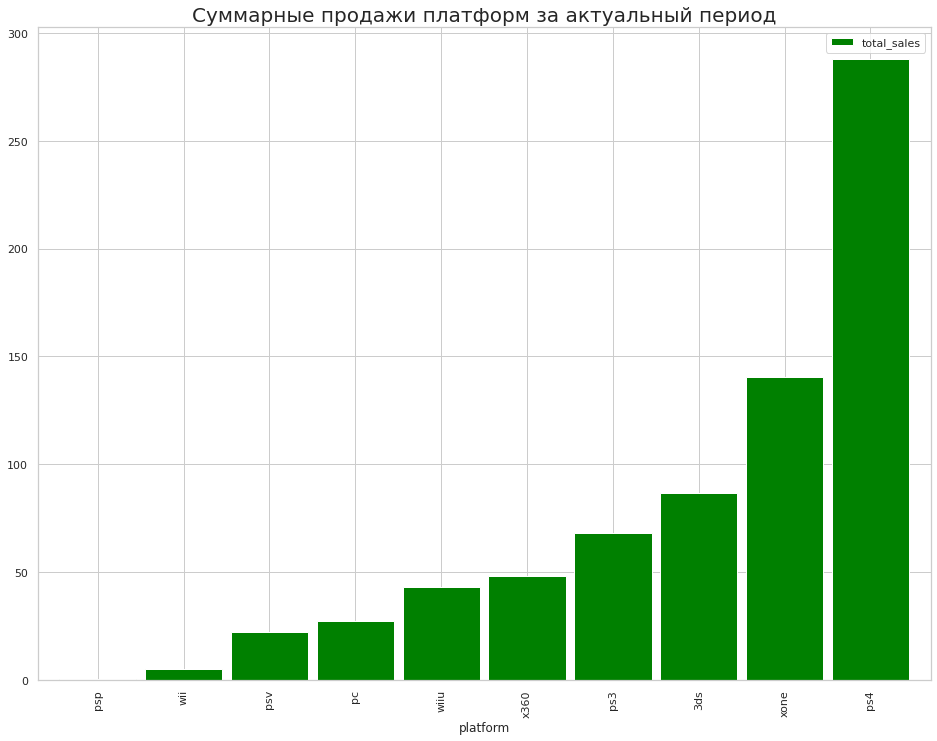

In [32]:
# распределение продаж платформ по годам за актуальный период

year_distr_model = actual_period.pivot_table(
    index='year', 
    columns='platform', 
    values='total_sales', 
    aggfunc='sum')

# график 1

sns.set(style='whitegrid', rc={"figure.figsize":(16 , 12)})
year_distr_model.reset_index().plot(x='year', kind='bar', width=0.9)
plt.title('Общие продажи платформ за год', fontsize=20)
plt.show()

actual_total_sales = actual_period.groupby('platform', as_index=False)['total_sales'].sum().sort_values(by='total_sales')

# график 2

sns.set(style='whitegrid', rc={"figure.figsize":(16 , 12)})
actual_total_sales.plot(x='platform', kind='bar', width=0.9, color='green')
plt.title('Суммарные продажи платформ за актуальный период', fontsize=20)
plt.show()

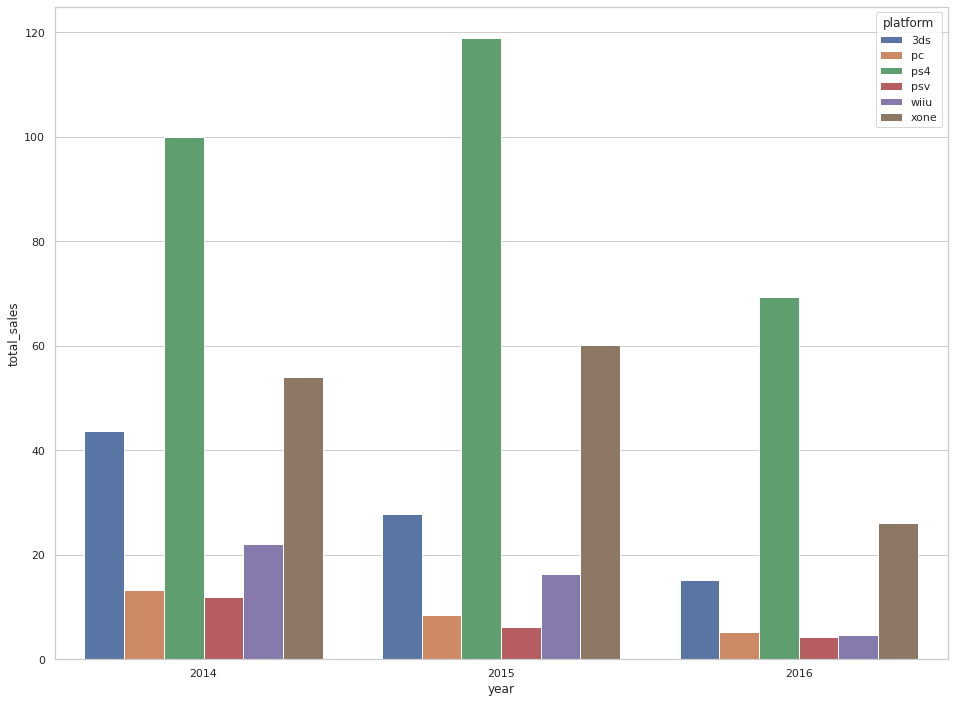

In [33]:
# корректитировка (удаляем часть платформ с упавшими продажами)

year_dm_corected = year_distr_model.drop(columns=['psp', 'wii', 'x360', 'ps3']).unstack().reset_index()
actual_platforms = list(year_dm_corected.columns)

sns.set(style='whitegrid', rc={"figure.figsize":(16 , 12)})
year_dm_corected.columns = ['platform', 'year', 'total_sales']
sns.barplot(x='year', y='total_sales', hue='platform', data=year_dm_corected)
plt.show()

На основе изучения продаж за актуальный период установлены потенциально перспективные платформы: **PS4, XOne, 3DS, PC, PSV**. PS3 удалена в связи с тем что срок её существования подходит к концу равно как X360 и Wii. Платформа PC существующая около 30 лет, до сих пор держится на плаву, а 3DS и PSV существуют всего 5 лет и вероятно ещё не израсходовали свой потенциал.

**Ящик с усами**

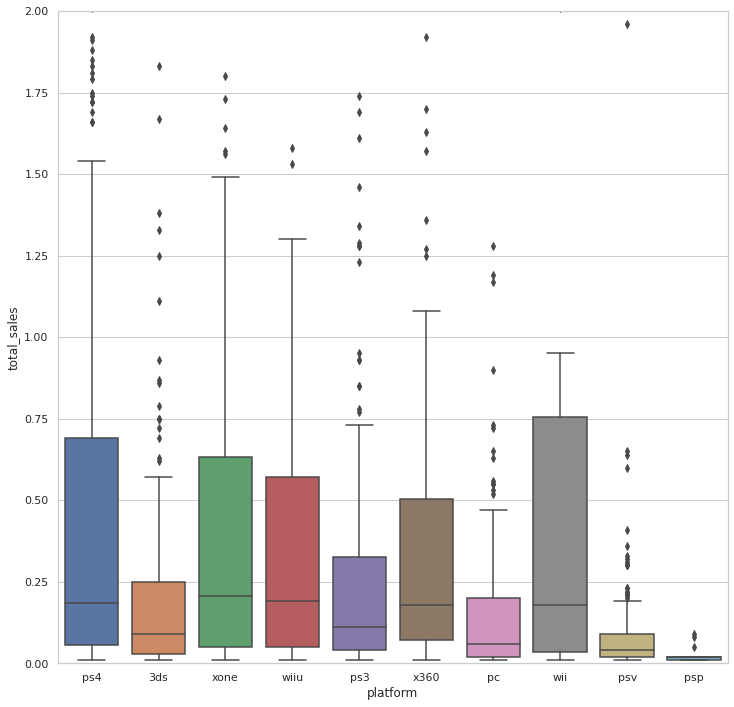

In [34]:
top_platforms = (
    actual_period.pivot_table(index="platform", values="total_sales", aggfunc="sum")
    .sort_values(by="total_sales", ascending=False)
    .head(10)
)

boxplot_top_list = list(top_platforms.index)
global_sales = actual_period.query("platform in @boxplot_top_list") 

sns.set(style='whitegrid', rc={"figure.figsize":(12 , 12)})
sns.boxplot(x='platform', y='total_sales', data=global_sales)
plt.ylim(0, 2)
plt.show()

Платформа популярна если её игры в общей сложности хорошо продаются. На данных диаграммах разамха их можно отличить благодаря более вытянутому межквартильному размаху и более низкому расположениею второго квартиля (Q2, медианы), что будет означать: более 50% данных об общих продажах расположены выше значения Q2.

**Влияние отзывов пользователей и критиков на продажи**

          total_sales
platform             
ps4            288.15
xone           140.36
3ds             86.68
ps3             68.18
x360            48.22
wiiu            42.98
pc              27.05
psv             22.40
wii              5.07
psp              0.36
Critic score correlation: 0.39
User score correlation: -0.03


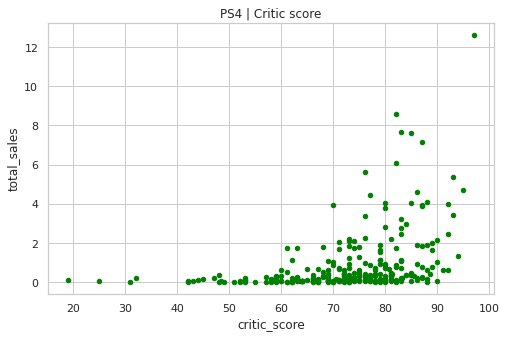

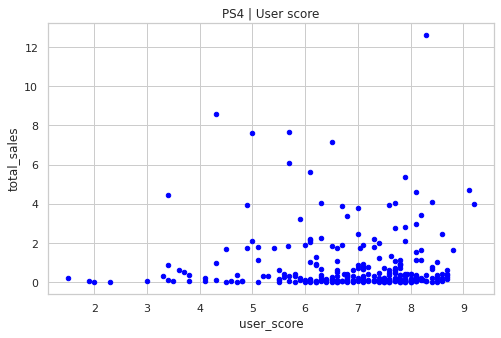

In [35]:
# топ платформ за актуальный период

print(top_platforms)

# фильтр по платформам

ps4_data = actual_period.query('platform == "ps4"')

# корреляция

print('Critic score correlation:', round(ps4_data['total_sales'].corr(ps4_data['critic_score']), 2))
print('User score correlation:', round(ps4_data['total_sales'].corr(ps4_data['user_score']), 2))

sns.set(style='whitegrid', rc={"figure.figsize":(8 , 5)})

ps4_data.plot(kind='scatter', x='critic_score', y='total_sales', title='PS4 | Critic score', color='green')
ps4_data.plot(kind='scatter', x='user_score', y='total_sales', title='PS4 | User score', color='blue')
plt.show()

In [36]:
print('User XONE:', round(actual_period.query('platform == "xone"')['total_sales'].corr(actual_period.query('platform == "xone"')['user_score']), 2))
print('Critic XONE:', round(actual_period.query('platform == "xone"')['total_sales'].corr(actual_period.query('platform == "xone"')['critic_score']), 2))
print('User PC:', round(actual_period.query('platform == "pc"')['total_sales'].corr(actual_period.query('platform == "pc"')['user_score']), 2))
print('Critic PC:', round(actual_period.query('platform == "pc"')['total_sales'].corr(actual_period.query('platform == "pc"')['critic_score']), 2))
print('User 3DS:', round(actual_period.query('platform == "3ds"')['total_sales'].corr(actual_period.query('platform == "3ds"')['user_score']), 2))
print('Critic 3DS:', round(actual_period.query('platform == "3ds"')['total_sales'].corr(actual_period.query('platform == "3ds"')['critic_score']), 2))

User XONE: -0.09
Critic XONE: 0.38
User PC: -0.07
Critic PC: 0.18
User 3DS: 0.24
Critic 3DS: 0.28


Анализ (для самомой популярной платформы) показывает что присуствует взаимосвязь между оценками и продажами. Оценки критиков умеренно коррелируют с продажами (корреляция 0.39), оценки пользователей обладают слабой отрицательной корреляцией -0.03, что можно списать на ошибку или погрешность. Однако от платформы к платформе показатели могут разниться например у 3DS корреляции продаж с пользовательскими оценками и оценками критиков примерно равны, но являются слабыми.

**Распределение игр по жанрам**

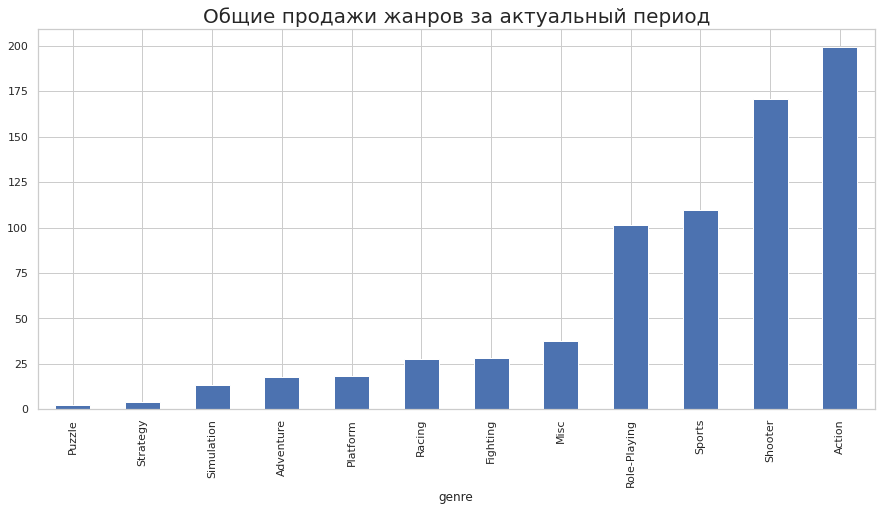

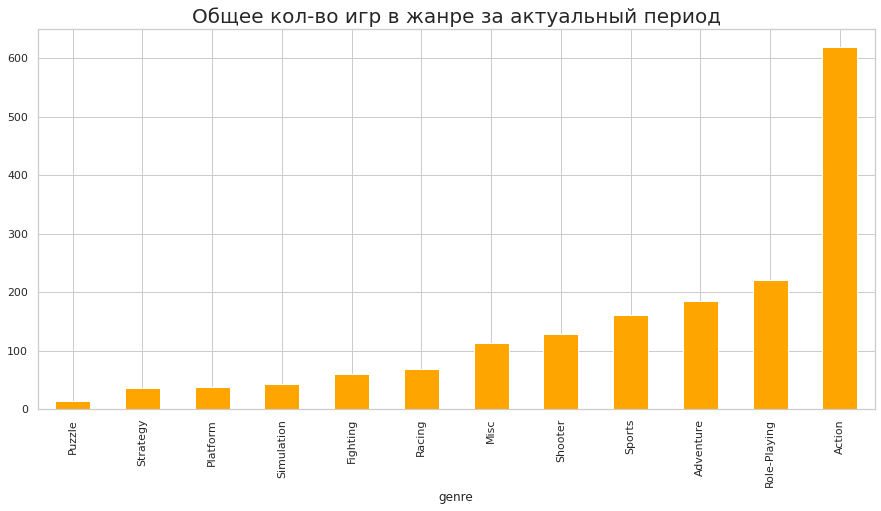

In [37]:
# создание серий для расчётов и построения графиков

genre_sales = actual_period.groupby('genre')['total_sales'].sum()
genre_count = actual_period.groupby('genre')['total_sales'].count()

ratio = genre_sales / genre_count

sns.set(style='whitegrid', rc={"figure.figsize":(15 , 7)})

# график общих продаж жанров за актуальный период

genre_sales.sort_values().plot(kind='bar')
plt.title('Общие продажи жанров за актуальный период', fontsize=20)
plt.show()

genre_count.sort_values().plot(kind='bar',  color='orange')
plt.title('Общее кол-во игр в жанре за актуальный период', fontsize=20)
plt.show()

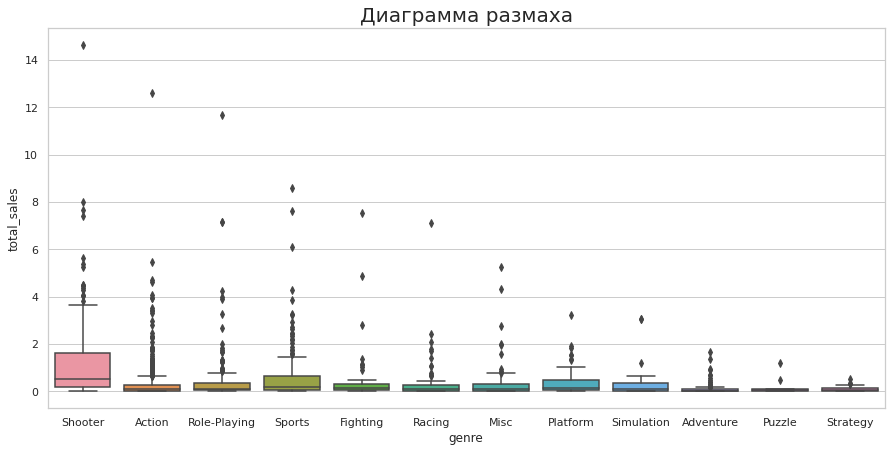

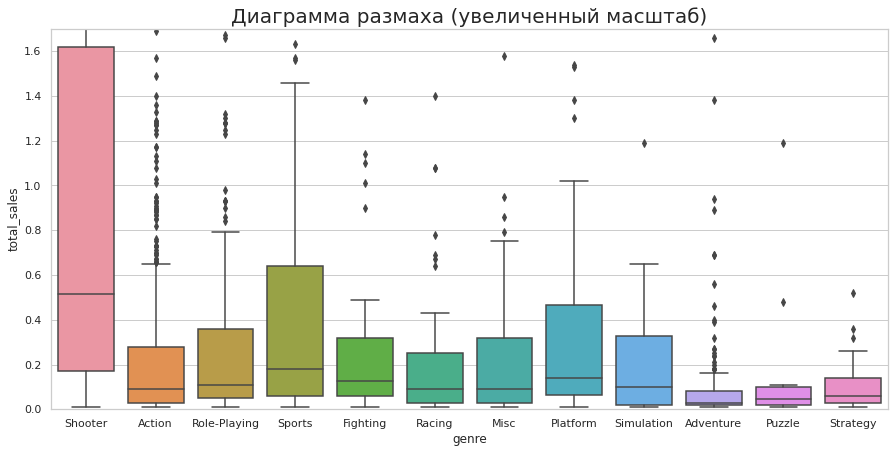

Средние продажи для пердставителя жанра: 
genre
Shooter         1.335469
Sports          0.680000
Platform        0.476053
Fighting        0.470333
Role-Playing    0.459005
Racing          0.398841
Misc            0.332301
Action          0.322068
Simulation      0.298409
Puzzle          0.157857
Strategy        0.107027
Adventure       0.094865
Name: total_sales, dtype: float64 
Медианы продаж по жанрам: 
genre
Shooter         0.515
Sports          0.180
Platform        0.140
Fighting        0.125
Role-Playing    0.110
Simulation      0.100
Action          0.090
Misc            0.090
Racing          0.090
Strategy        0.060
Puzzle          0.045
Adventure       0.030
Name: total_sales, dtype: float64


In [38]:
sns.boxplot(data=actual_period, x='genre', y='total_sales').set(title='lalala')
plt.title('Диаграмма размаха', fontsize=20)
plt.show()

sns.boxplot(data=actual_period, x='genre', y='total_sales')
plt.title('Диаграмма размаха (увеличенный масштаб)', fontsize=20)
plt.ylim(0, 1.7)
plt.show()

print(f'Средние продажи для пердставителя жанра: \n{ratio.sort_values(ascending=False)}', 
      '\n==================================')
print(f'Медианы продаж по жанрам: \n{actual_period.groupby("genre")["total_sales"].median().sort_values(ascending=False)}')

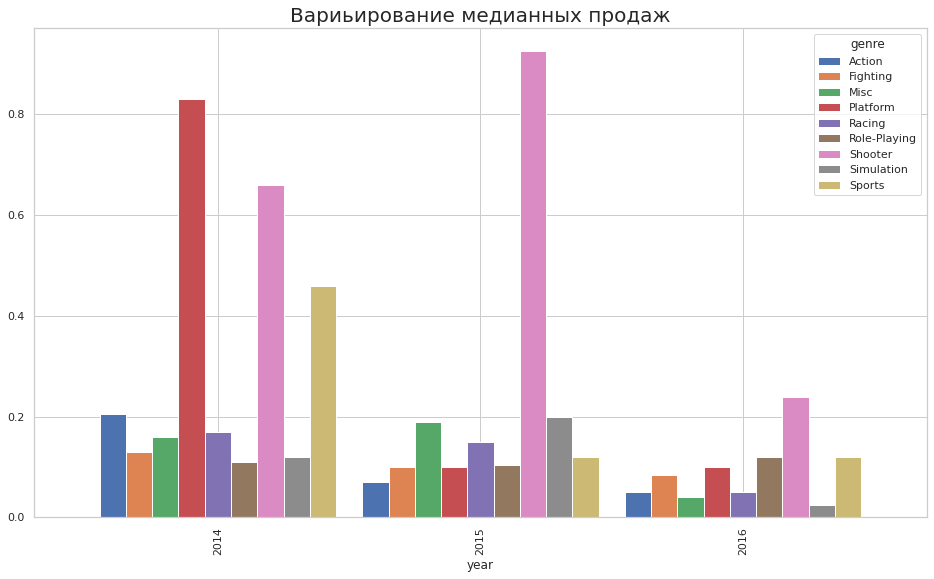

In [39]:
median_stability = actual_period.pivot_table(
    index='year', 
    columns='genre', 
    values='total_sales', 
    aggfunc='median')

ms_corected = median_stability.drop(columns=['Adventure', 'Puzzle', 'Strategy'])

sns.set(style='whitegrid', rc={"figure.figsize":(16 , 9)})
ms_corected.reset_index().plot(x='year', kind='bar', width=0.9)
plt.title('Вариьирование медианных продаж', fontsize=20)
plt.show()

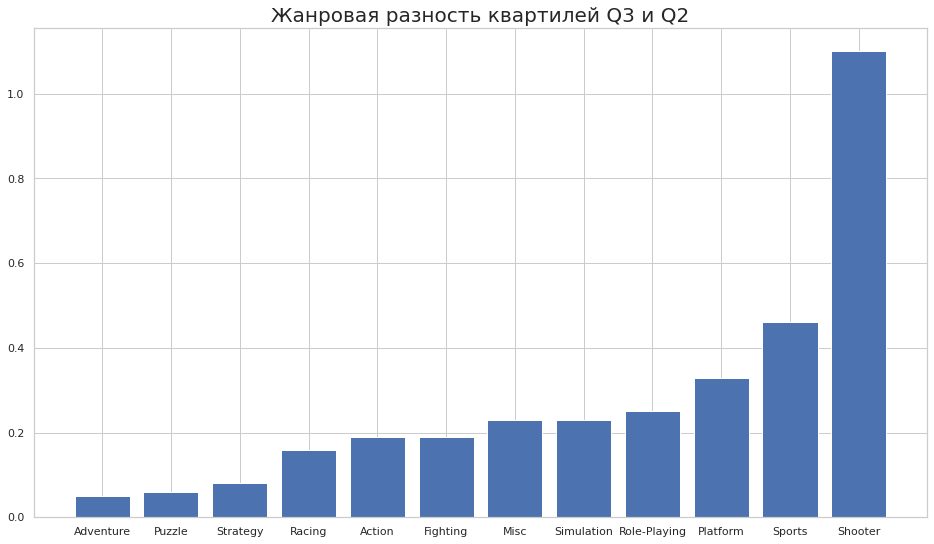

In [40]:
# график разности 0.75 и 0.5 квантилей для оценки успешности

success = {}

for gen in actual_period['genre'].unique():
    success[gen] = round(actual_period.query('genre == @gen').quantile(q=0.75, axis=0)['total_sales'] - \
                            actual_period.query('genre == @gen').quantile(q=0.5, axis=0)['total_sales'], 2)
suc = pd.Series(index=success.keys(), data=list(success.values())).sort_values()
                
plt.bar(suc.index, suc, align='center')   
plt.title('Жанровая разность квартилей Q3 и Q2', fontsize=20)
plt.show()

* Медианные продажи за актуальные период следующие (топ-5): **shooter = 0.515, sports = 0.18, platform = 0.14, fighting = 0.125, role-playing = 0.11**
* Среднее кол-во продаж у представителей жанра **Shooter** = 1.335
* Стабильность медианных продаж (за исключением 2016 года из-за неполноты данных) проявляют такие жанры **shooter, role-playing misc, racing, simulation.**
* Ряды успешно продающихся игр наиболее высоки у жанров: **shooter, sports, platform, role-playing, simulation.**

**Вывод:** Самым прибильными жанром является **Shooter**, больше всего игр выпущено и продано в жанре **Action**.

## Портрет пользователя в регионе

**Топ-5 платформ**

Регион: NA | Топ: ['ps4', 'xone', 'x360', '3ds', 'ps3'] | Доля: 89.02%
Регион: EU | Топ: ['ps4', 'xone', 'ps3', 'pc', '3ds'] | Доля: 87.16%
Регион: JP | Топ: ['3ds', 'ps4', 'psv', 'ps3', 'wiiu'] | Доля: 99.18%


/tmp/ipykernel_1597/1174025473.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_1.set_xticklabels(labels=graph.sort_values(by='NA').index, rotation=90)
/tmp/ipykernel_1597/1174025473.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_2.set_xticklabels(labels=graph.sort_values(by='EU').index, rotation=90)
/tmp/ipykernel_1597/1174025473.py:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_3.set_xticklabels(labels=graph.sort_values(by='JP').index, rotation=90)


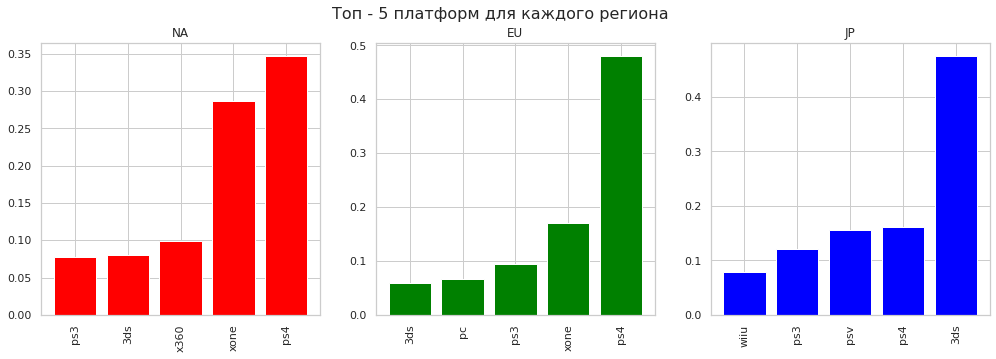

In [41]:
region_platform_data = actual_period.pivot_table(
    index="platform", 
    values=["na_sales", "eu_sales", "jp_sales", "total_sales"], 
    aggfunc="sum"
)

# создание колонок для вычисления долей от общих продаж в регионе

platforms_distr = pd.DataFrame()

platforms_distr['part_na'] = region_platform_data['na_sales'] / actual_period['na_sales'].sum()
platforms_distr['part_eu'] = region_platform_data['eu_sales'] / actual_period['eu_sales'].sum()
platforms_distr['part_jp'] = region_platform_data['jp_sales'] / actual_period['jp_sales'].sum()

dict = {'part_na': 'NA', 'part_eu': 'EU', 'part_jp': 'JP'}

platforms = platforms_distr.index

# цикл для создания и распечатки статистики

for reg in ["part_na", "part_eu", "part_jp"]:
    reg_top = [i for i in platforms_distr[reg].sort_values(ascending=False).head().index]
    print(f"Регион: {dict[reg]} | Топ: {reg_top} | Доля: {platforms_distr.loc[reg_top, reg].sum():.2%}")
    
    # цикл для выделения топовых категорий
    
    for index in reg_top:
        platforms_distr.loc[index, dict[reg]] = platforms_distr.loc[index, reg]
        
    # выделение НЕ топовых категорий в остальные
    
    platforms_distr.loc['Other', dict[reg]] = platforms_distr.loc[set(platforms)-set(reg_top), reg].sum(axis=0)
    
# построение графиков

# таблица без НЕ входящих в топ жанров

graph = platforms_distr.drop('Other', axis=0)

sns.set(style='whitegrid', rc={"figure.figsize":(17 , 5)})

fig = plt.figure()
fig.suptitle('Топ - 5 платформ для каждого региона', fontsize=16)

ax_1 = fig.add_subplot(1, 3, 1)
ax_2 = fig.add_subplot(1, 3, 2)
ax_3 = fig.add_subplot(1, 3, 3)

ax_1.set(title = 'NA')
ax_2.set(title = 'EU')
ax_3.set(title = 'JP')

ax_1.set_xticklabels(labels=graph.sort_values(by='NA').index, rotation=90)
ax_2.set_xticklabels(labels=graph.sort_values(by='EU').index, rotation=90)
ax_3.set_xticklabels(labels=graph.sort_values(by='JP').index, rotation=90)

ax_1.bar(x=graph.index, height='NA', data=graph.sort_values(by='NA'), color='red')
ax_2.bar(x=graph.index, height='EU', data=graph.sort_values(by='EU'), color='green')
ax_3.bar(x=graph.index, height='JP', data=graph.sort_values(by='JP'), color='blue')

plt.show()

В топ популярных платформ входят **PS4, XOne, 3DS, PS3** из-за присутствия во всех регионах. Топы Америки и Европы различаются преобладающими **X360 и PC**. В Японии наиболее популярна **3DS**

**Топ-5 жанров**

Регион: NA | Топ: ['Shooter', 'Action', 'Sports', 'Role-Playing', 'Misc'] | Доля: 86.67%
Регион: EU | Топ: ['Action', 'Shooter', 'Sports', 'Role-Playing', 'Racing'] | Доля: 84.32%
Регион: JP | Топ: ['Role-Playing', 'Action', 'Fighting', 'Misc', 'Shooter'] | Доля: 83.35%


/tmp/ipykernel_1597/3431062431.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_1.set_xticklabels(labels=graph.sort_values(by='NA').index, rotation=90)
/tmp/ipykernel_1597/3431062431.py:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_2.set_xticklabels(labels=graph.sort_values(by='EU').index, rotation=90)
/tmp/ipykernel_1597/3431062431.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_3.set_xticklabels(labels=graph.sort_values(by='JP').index, rotation=90)


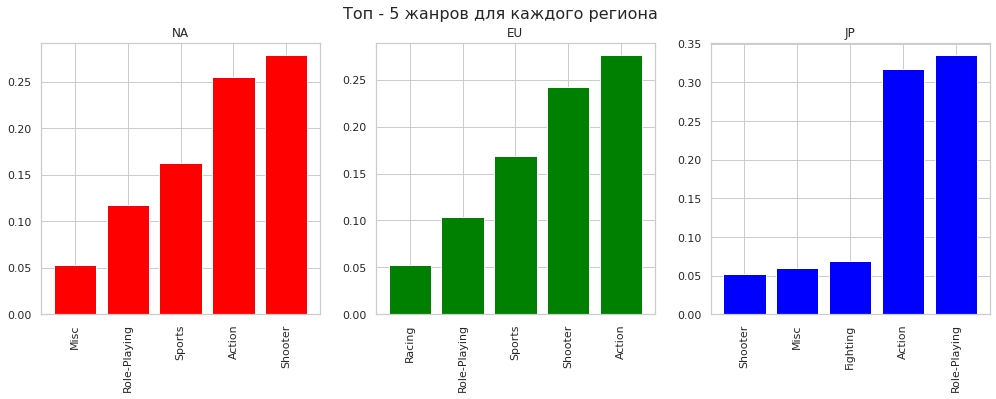

In [42]:
region_genre_data = actual_period.pivot_table(
    index="genre", 
    values=["na_sales", "eu_sales", "jp_sales", "total_sales"], 
    aggfunc="sum"
)

# создание колонок для вычисления долей от общих продаж в регионе

genre_distr = pd.DataFrame()

genre_distr['part_na'] = region_genre_data['na_sales'] / actual_period['na_sales'].sum()
genre_distr['part_eu'] = region_genre_data['eu_sales'] / actual_period['eu_sales'].sum()
genre_distr['part_jp'] = region_genre_data['jp_sales'] / actual_period['jp_sales'].sum()

genres = genre_distr.index

# цикл для создания и распечатки статистики

for reg in ["part_na", "part_eu", "part_jp"]:
    reg_top = [i for i in genre_distr[reg].sort_values(ascending=False).head().index]
    print(f"Регион: {dict[reg]} | Топ: {reg_top} | Доля: {genre_distr.loc[reg_top, reg].sum():.2%}")
    
    # цикл для выделения топовых категорий
    
    for index in reg_top:
        genre_distr.loc[index, dict[reg]] = genre_distr.loc[index, reg]
        
    # выделение НЕ топовых категорий в остальные
    
    genre_distr.loc['Other', dict[reg]] = genre_distr.loc[set(genres)-set(reg_top), reg].sum(axis=0)
    
# построение графиков

# таблица без НЕ входящих в топ жанров

graph = genre_distr.drop('Other', axis=0)

sns.set(style='whitegrid', rc={"figure.figsize":(17 , 5)})

fig = plt.figure()
fig.suptitle('Топ - 5 жанров для каждого региона', fontsize=16)

ax_1 = fig.add_subplot(1, 3, 1)
ax_2 = fig.add_subplot(1, 3, 2)
ax_3 = fig.add_subplot(1, 3, 3)

ax_1.set(title = 'NA')
ax_2.set(title = 'EU')
ax_3.set(title = 'JP')

ax_1.set_xticklabels(labels=graph.sort_values(by='NA').index, rotation=90)
ax_2.set_xticklabels(labels=graph.sort_values(by='EU').index, rotation=90)
ax_3.set_xticklabels(labels=graph.sort_values(by='JP').index, rotation=90)

ax_1.bar(x=graph.index, height='NA', data=graph.sort_values(by='NA'), color='red')
ax_2.bar(x=graph.index, height='EU', data=graph.sort_values(by='EU'), color='green')
ax_3.bar(x=graph.index, height='JP', data=graph.sort_values(by='JP'), color='blue')

plt.show()

Жанры в Америке и Европе так же схожи за исключением **Misc** (NA) и **Racing** (EU). Самый популярный жанр в совокупности: **Action.**

**Влияние рейтинга ESRB на продажи в отдельном регионе**

Описание значений в колонке с рейтингом:  
**T** - (Teen) для подростков  
**M** - (Mature) для взрослых  
**E** - (Everyone) для всех  
**E10+** - (Everyone 10 and older) для всех старше 10 лет

    rating  eu_sales  jp_sales  na_sales        na        eu        jp
0        E     58.06      8.94     50.74  0.526239  0.621361  0.157118
1     E10+     26.16      4.46     33.23  0.344638  0.279966  0.078383
2        M     93.44      8.01     96.42  1.000000  1.000000  0.140773
3        T     34.07     14.78     38.95  0.403962  0.364619  0.259754
4  unknown     58.95     56.90     64.72  0.671230  0.630886  1.000000 
    rating  count     ratio
0        E    219  0.292390
1     E10+    185  0.246996
2        M    265  0.353805
3        T    271  0.361816
4  unknown    749  1.000000


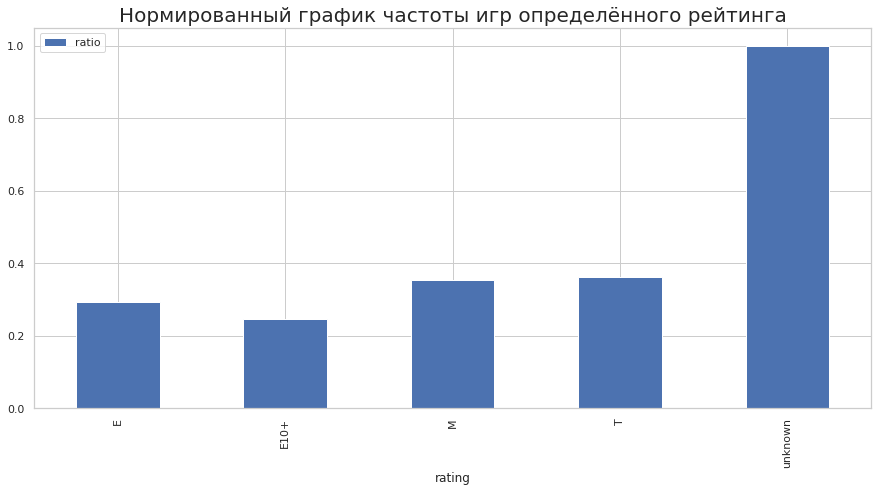

In [43]:
region_esrb_data = actual_period.pivot_table(index="rating",
                                             values=["na_sales", "eu_sales", "jp_sales"], 
                                             aggfunc="sum").reset_index()

freq = actual_period.pivot_table(index="rating",
                      values='total_sales', 
                      aggfunc='count').reset_index()

freq['ratio'] = freq['total_sales'] / freq['total_sales'].max()
freq.columns = ['rating', 'count', 'ratio']

region_esrb_data['na'] = region_esrb_data['na_sales'] / max(region_esrb_data['na_sales'])
region_esrb_data['eu'] = region_esrb_data['eu_sales'] / max(region_esrb_data['eu_sales'])
region_esrb_data['jp'] = region_esrb_data['jp_sales'] / max(region_esrb_data['jp_sales'])

print(region_esrb_data, '\n============================')
print(freq)

sns.set(style='whitegrid', rc={"figure.figsize":(15 , 7)})

freq.plot(x='rating', y='ratio', kind='bar')
plt.title('Нормированный график частоты игр определённого рейтинга', fontsize=20)
plt.show()

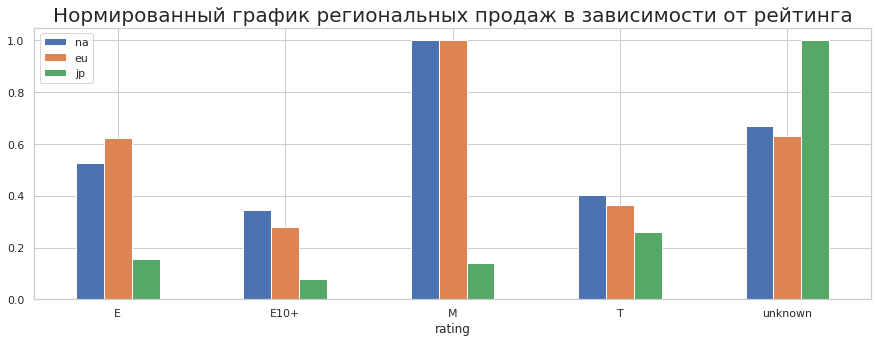

In [44]:
sns.set(style='whitegrid', rc={"figure.figsize":(15 , 5)})
region_esrb_data.plot(x='rating', y=['na', 'eu', 'jp'], kind='bar')
plt.title('Нормированный график региональных продаж в зависимости от рейтинга', fontsize=20)
plt.xticks(rotation=0)
plt.show()

Рейтинг ESRB влияет на продажу. Так игры с рейтингом **M** продаются лучше всего в Северной Америке и Европе. В Японии лучше всего продаются игры с рейтингом **T**, однако рекорд по продажам расположен в категории **unknown** в которую входят игры со случайно пропущеным рейтингом или не имеющие рейтинга ESRB.

## Проверка гипотез

* Нулевая гипотеза №1 => Средние пользовательские рейтинги платформ **XBox One** и **PC** равны
* Альтернативная гипотеза №1 => Средние пользовательские рейтинги платформ **XBox One** и **PC** НЕ равны


* Нулевая гипотеза №2 => Средние пользовательские рейтинги жанров **action** и **sports** равны
* Альтернативная гипотеза №2 => Средние пользовательские рейтинги жанров **action** и **sports** НЕ равны

Для проверки гипотез будем использовать метод scipy.stats.ttest_ind(), использующийся для сравнения средних двух независимых генеральных совокупностей по взятым из них выборкам.

**Гипотеза №1**

In [45]:
# форммирование серий для проверки гипотез

pc = actual_period.query('platform == "pc" and user_score.isna() == False')['user_score']
xone = actual_period.query('platform == "xone" and user_score.isna() == False')['user_score']

# критический уровень статистической значимости

alpha = 0.01

results = st.ttest_ind(pc, xone, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.04669916402848308
Не получилось отвергнуть нулевую гипотезу


**Гипотеза №2**

In [46]:
# формирование серий для проверки гипотез

action = actual_period.query('genre == "Action" and user_score.isna() == False')['user_score']
sports = actual_period.query('genre == "Sports" and user_score.isna() == False')['user_score']

results = st.ttest_ind(action, sports, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.0380665060277228e-17
Отвергаем нулевую гипотезу


**Вывод:** 
* средние значения пользовательских оценок **XBox One** и **PC** равны
* средние значения пользовательских оценок **Action** и **Sports** не равны

## Общий вывод

На основе анализа данных предоставленных интернет-магазином по продаже компьютерных игр за промежуток времени с 1980 по 2016 год был выбран актуальный промежуток времени с 2014 по 2016 год с целью прогнозирования продаж на 2017 год и установлены следующие факты:

* Характерный период существования платформы составляет в среднем 10 лет
* Существует умеренная корреляция между оценками критиков и продажами игр.
* Жанр с самым высоким спросом: **action**
* Самый прибыльный в расчёте на единицу жанр: **shooter**
* Определили потенциально прибыльные платформы: **PS4, XOne, 3DS, PC, PSV**
* Самые популярные платформы в регионах: 
    - **Северная Америка:** Топ: PS4, XOne, X360, 3DS, PS3 **|**Доля **89.02%**
    - **Европа:** Топ: PS4, XOne, PS3, PC, 3DS **|** Доля **87.16%**
    - **Япония:** Топ: 3DS, PS4, PSV, PS3, Wii U **|** Доля **99.18%**
* Самые популярные жанры в регионах:
    - **Северная Америка:** Shooter, Action, Sports, Role-Playing, Misc **|** Доля **86.67%**
    - **Европа:** Action, Shooter, Sports, Role-Playing, Racing **|** Доля **84.32%**
    - **Япония:** Role-Playing, Action, Fighting, Misc, Shooter **|** Доля **83.35%**
* Рейтинг ESRB влияет на региональные продажи: Рекордные продажи игр в Америке и Европе имеют рейтинг **M**.
* Средние значения пользовательских рейтингов платформ **XOne** и **PC** примерно однаковые
* Отвергнута гипотеза о сравнестве средних значений оценок для жанров **Action** и **Sports**